# Adding to SWC Intro Python course

One of the main differences between SWC's Intro R and Intro Python courses is that the for loop in the [fourth module](http://swcarpentry.github.io/python-novice-inflammation/04-files/index.html) doesn't include outputting the plots to the directory system. The code below does this.

In [13]:
import numpy
import matplotlib.pyplot as mplot
%matplotlib inline

## Analysing graphs all at once and outputting as PDFs into the Graphs folder
Making a slight addition to the course material to be more inline with the R Intro course; not just printing the graphs internally but also outputting them to specific directory

In [11]:
import glob
import os
import re
filenames = sorted(glob.glob('data/inflammation*.csv'))

### ADDING THIS TO CREATE A DIRECTORY TO PLACE THE GRAPH PDF OUTPUTS
if not os.path.exists("graphs"): 
    os.makedirs("graphs")

### NEW FUNCTION TO CLEAN UP FILENAMES

so that we can save our puts to another directory (the "Graphs" directory)

In [1]:
def clean_fn(filename):
    clean_fn = re.sub("(^.*/)(.*)(\\.csv)", "\\2", filename)
    return clean_fn

### NEW FUNCTION TO CONDUCT THE ANALYSIS

In [27]:
def analyze(filename):
    clean_filename = clean_fn(filename)
    data = numpy.loadtxt(fname=filename, delimiter=',')
    
    fig = matplotlib.pyplot.figure(figsize=(15.0, 4.0))
    fig.suptitle('clean_filename', fontsize=15)

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.set_xlabel('Days') #### ADDING THIS LINE
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.set_xlabel('Days')#### ADDING THIS LINE
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.set_xlabel('Days')#### ADDING THIS LINE
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.savefig("graphs/"+clean_filename+".pdf") #### ADDING THIS LINE
    matplotlib.pyplot.show()

### FUNCTION TO CHECK THE DATA

In [4]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

### RUN THESE FUNCTIONS ALL TOGETHER FOR EACH FILENAME

data/inflammation-01.csv


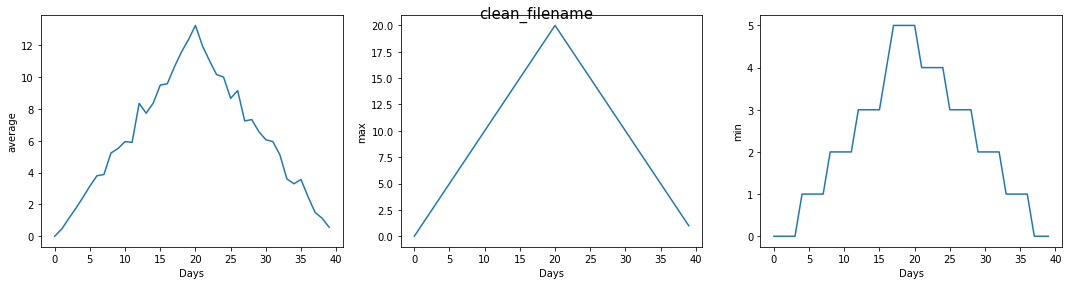

Suspicious looking maxima!
data/inflammation-02.csv


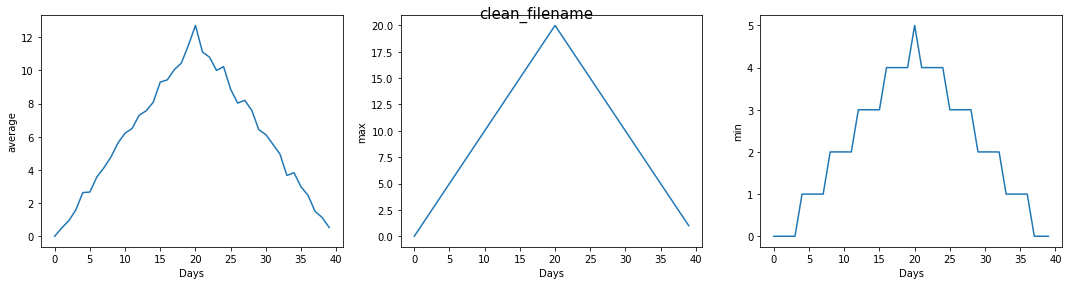

Suspicious looking maxima!
data/inflammation-03.csv


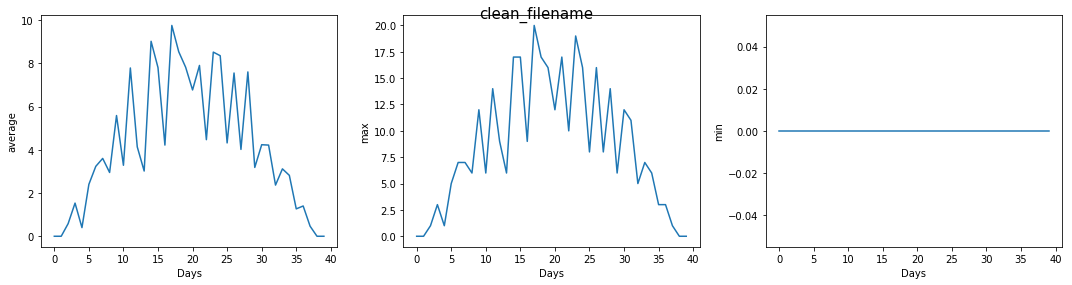

Minima add up to zero!
data/inflammation-04.csv


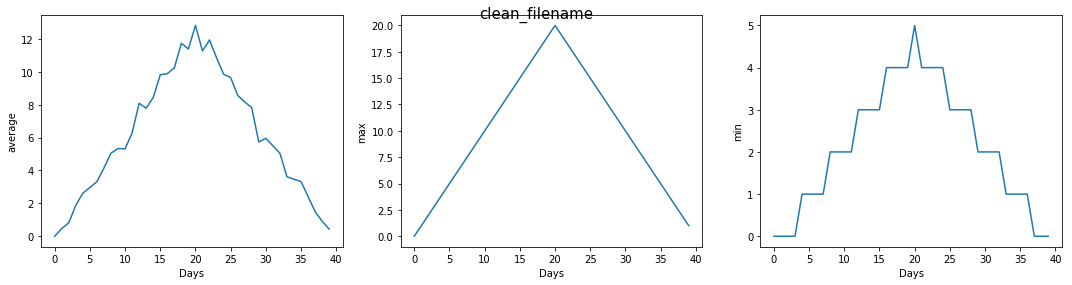

Suspicious looking maxima!
data/inflammation-05.csv


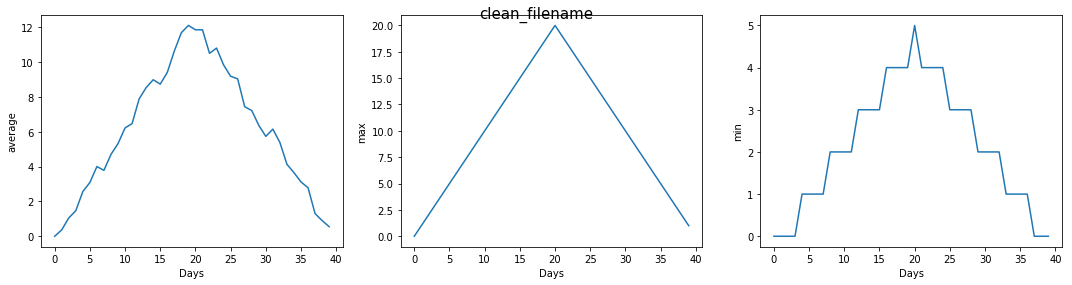

Suspicious looking maxima!
data/inflammation-06.csv


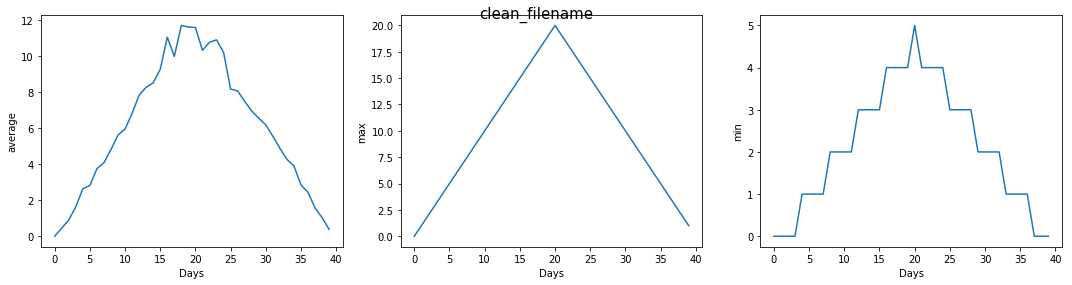

Suspicious looking maxima!
data/inflammation-07.csv


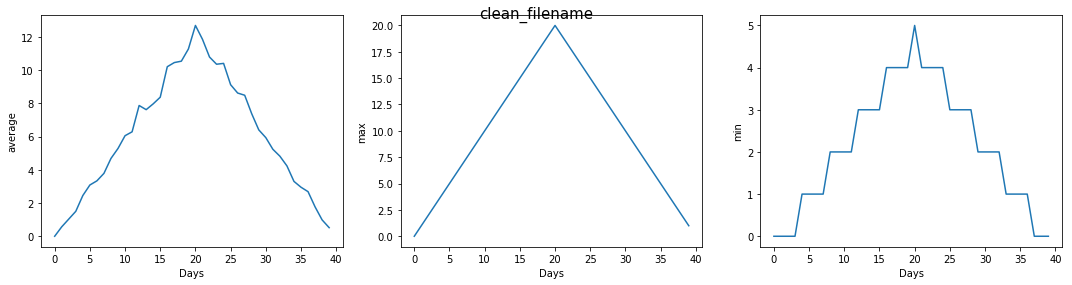

Suspicious looking maxima!
data/inflammation-08.csv


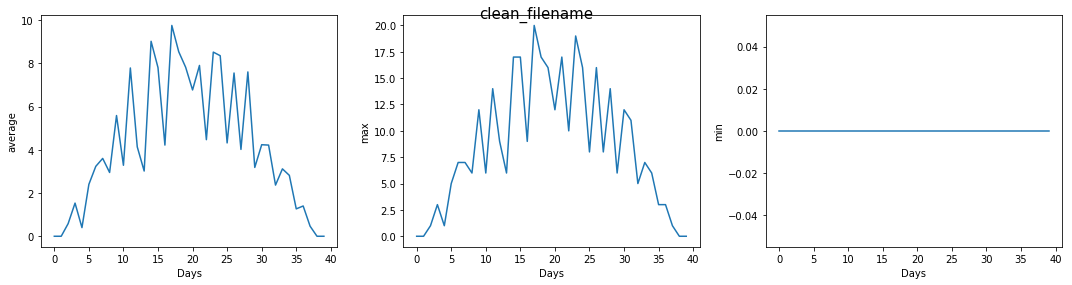

Minima add up to zero!
data/inflammation-09.csv


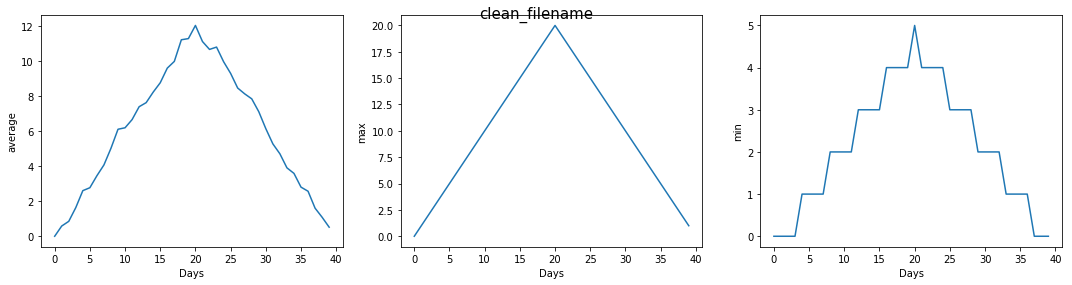

Suspicious looking maxima!
data/inflammation-10.csv


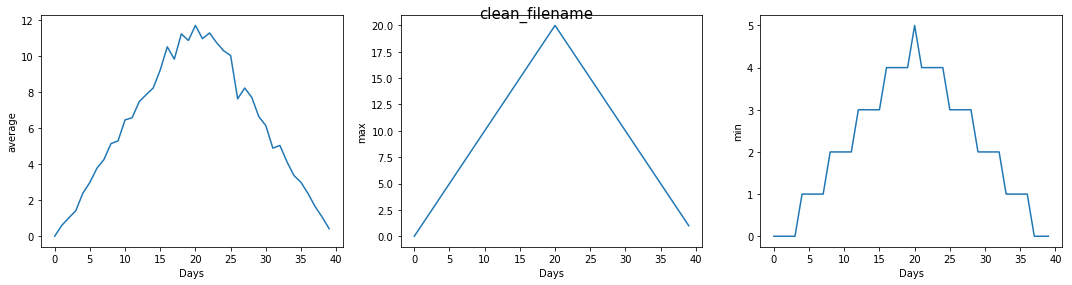

Suspicious looking maxima!
data/inflammation-11.csv


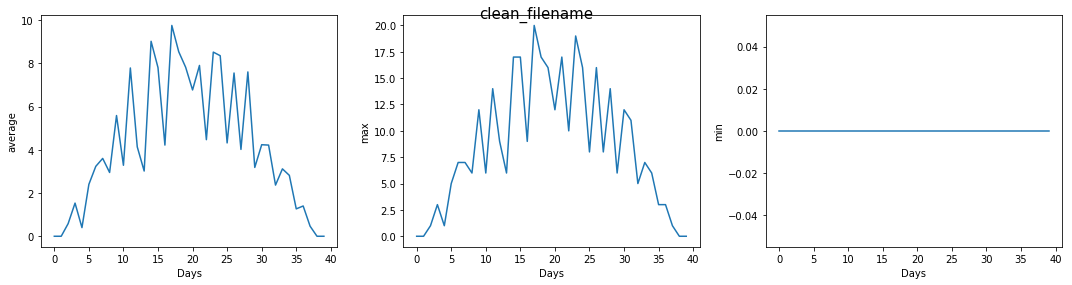

Minima add up to zero!
data/inflammation-12.csv


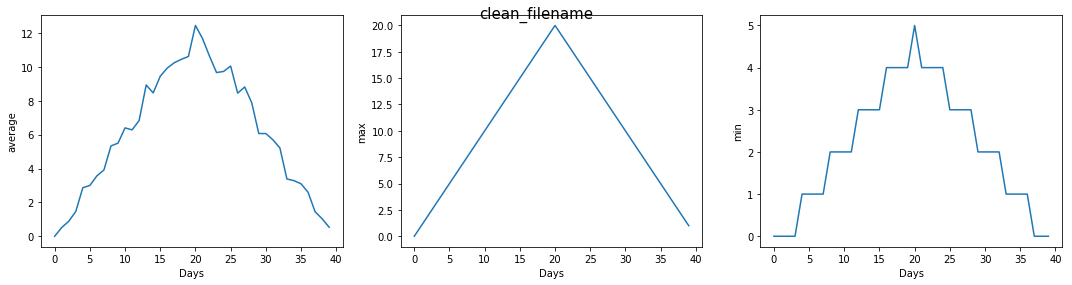

Suspicious looking maxima!


In [28]:
for f in filenames:
    print(f)
    analyze(f)
    detect_problems(f)

## Finding Keywords

Also, adding this because it's sometimes good to reference the recognised keywords of Python. 

In [1]:
import keyword
print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']
